# __Splitting Dataset__

<hr>
<hr>

apa akibatnya kalau semua data digunakan untuk training model ML?
1. model ML overfitting terhadap data yg dimiliki
2. model ML underfitting terhadap data baru

Buku IPA: materi, soal ulangan harian, soal ujian akhir, jawaban soal
misal buku diberikan kpd setiap siswa dan siswa belajar. saat ujian, soalnya sama persis seperti di buku. hasilnya kemungkinan 100% lulus.
ketika ada ujian penerimaan mahasiswa baru dgn soal rahasia. 
kira2 apa yg tjd? asal tahu materinya. siswa lulus. kalo siswa cuma tahu soal-soal saja kemungkinan lulus kecil.

Buku IPA: materi, soal, summary, dst
ketika ujian, soal diambil dari source yg lain.
TEST > bagaimana pemahaman siswa thd materi ipa

sama halnya dgn ML. lebih baik tidak menggunakan seluruh data

- Contoh
    Dataset ```[0 1 2 3 4 5 6 7 8 9]```
    
    Split dataset:
    - 75% untuk training : 7 data acak
    - 25% untuk testing : 3 data acak
    harus mewakili


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
dataBoston = load_boston()

In [4]:
dfBoston = pd.DataFrame(
    dataBoston['data'],
    columns = dataBoston['feature_names'])
dfBoston['PRICE'] = dataBoston['target']
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 1. Split Manual (80% training, 20% testing)

In [5]:
dfA = dfBoston.copy()
dfA.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
round(0.8 * 506), round(0.2 * 506)

(405, 101)

In [7]:
dfAtrain = dfA[:405]
dfAtest = dfA[405:]

In [ ]:
dfAtrain.tail()

In [9]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model2 = LinearRegression()

In [10]:
# model 1 : linear regression
# train : dfA, features: ['RM', 'LSTAT'], target: ['PRICE']

model1.fit(dfA[['RM', 'LSTAT']], dfA['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# model 2 : linear regression
# train : dfAtrain, features: ['RM', 'LSTAT'], target: ['PRICE']
# test : dfAtest, features: ['RM', 'LSTAT'], target: ['PRICE']

model2.fit(dfAtrain[['RM', 'LSTAT']], dfAtrain['PRICE'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(model1.coef_, model1.intercept_)
print(model2.coef_, model2.intercept_)

[ 5.09478798 -0.64235833] -1.3582728118744818
[ 6.28559228 -0.52915375] -9.628402588875087


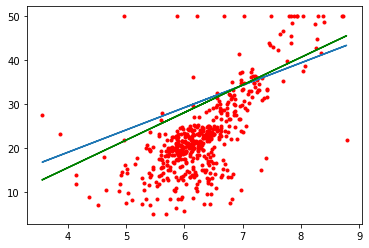

In [16]:
plt.plot(dfA['RM'], dfA['PRICE'], 'r.')
plt.plot(dfA['RM'], model1.coef_[0] * dfA['RM'] + model1.intercept_)
plt.plot(dfAtrain['RM'], model2.coef_[0] * dfAtrain['RM'] + model2.intercept_, 'g-')
plt.show()

In [17]:
dfAtrain['PRICEpred'] = model2.predict(dfAtrain[['RM', 'LSTAT']])

<ipython-input-17-a62e9887840c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAtrain['PRICEpred'] = model2.predict(dfAtrain[['RM', 'LSTAT']])


In [19]:
# cek akurasi prediksi model1 thd semua data

model1.score(dfA[['RM', 'LSTAT']], dfA['PRICE'])

0.6385616062603403

In [18]:
# cek akurasi prediksi model2 thp data training

model2.score(dfAtrain[['RM', 'LSTAT']], dfAtrain['PRICE'])

0.6490254493845824

In [ ]:
# cek akurasi prediksi model2 thp data testing

model2.score(dfAtest[['RM', 'LSTAT']], dfAtset['PRICE'])

In [ ]:
# DATA YG STABIL KALO AKURASI PREDIKSINYA TRAINING DAN TESTING SAMA

In [20]:
# 2. Splitting using sklearn

In [21]:
dfB = dfBoston.copy()

In [22]:
# splitting with train_test_split method
from sklearn.model_selection import train_test_split

In [23]:
#train_test_split(data feature X, target Y, train_size=.8)
# method ini returnnya 4 variables
# x 80% = x train
# x 20% = x test
# y 80% = y train
# y 20% = y tes
xtrain, xtes, ytrain, ytes = train_test_split(
    dfB[['RM', 'LSTAT']], dfB['PRICE'], train_size=.8)

#random_state supaya 

In [28]:
xtrain
xtrain.count()
xtrain.iloc[0]
xtrain.iloc[0].name
ytrain.index[0]

70

In [29]:
modelB = LinearRegression()
# training dgn xtrain dan ytrain
modelB.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# cek akurasi thd data training
modelB.score(xtrain, ytrain)

0.64970659877571

In [32]:
# cek akurasi thd data testing
modelB.score(xtes, ytes)

0.589831200280184

In [33]:
## Effect salah splitting

In [34]:
dfC = dfBoston.copy()

In [35]:
modelC = LinearRegression()
modelC.fit(dfC[['RM', 'LSTAT']][:2], dfC['PRICE'][:2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

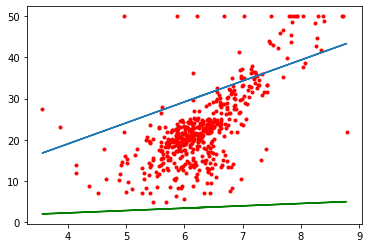

In [37]:
plt.plot(dfC['RM'], dfC['PRICE'], 'r.')
plt.plot(dfA['RM'], model1.coef_[0] * dfA['RM'] + model1.intercept_)
plt.plot(dfC['RM'], modelC.coef_[0] * dfC['RM'] * modelC.intercept_, 'g-')
plt.show()